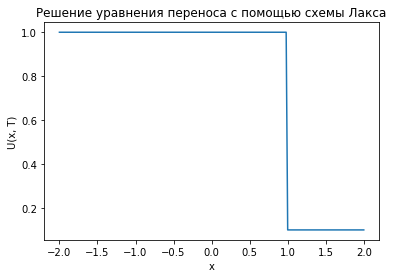

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Параметры
T = 2.0 # общее время симуляции
L = 4.0 # длина расчетной области
h = 0.02 # шаг по пространству
tau = 0.02 # шаг по времени, удовлетворяющий условию Куранта
# Число шагов
M = int(L / h) # число шагов в пространственной сетке
N = int(T / tau) # число шагов во временной сетке
# Создание сетки
x = np.linspace(-2, 2, M+1)
t = np.linspace(0, T, N+1)
# Инициализация решения сеточной функцией U с начальными и граничнымиусловиями
U = np.zeros((M+1,N+1)) # U[m][n] соответствует U(x_m, t_n)
U[x < -1,0] = 1.0 # начальное условие U(x,0) = 1, x < -1
U[x >= -1, 0] = 0.1 # начальное условие U(x,0) = 0.1, x >= -1
U[0, :] = 1.0 # граничное условие U(-2,t) = 1
U[M, :] = 0.1 # граничное условие U(2,t) = 0.1
# Основной цикл для шага по времени n >= 1
for n in range(1, N+1):
    for m in range(1, M):
        U[m, n] = 0.5 * (U[m+1, n-1] + U[m-1, n-1]) - 0.5 * tau / h * (U[m+1, n-1] - U[m-1, n-1])
# Визуализация результата для последнего временного слоя
plt.plot(x, U[:, -1])
plt.title('Решение уравнения переноса с помощью схемы Лакса')
plt.xlabel('x')
plt.ylabel('U(x, T)')
plt.show()

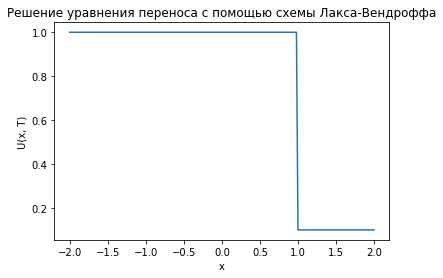

In [7]:
# Создание сетки
x = np.linspace(-2, 2, M+1)
t = np.linspace(0, T, N+1)
# Инициализация решения сеточной функцией U с начальными и граничнымиусловиями
U = np.zeros((M+1,N+1)) # U[m][n] соответствует U(x_m, t_n)
U[x < -1,0] = 1.0 # начальное условие U(x,0) = 1, x < -1
U[x >= -1, 0] = 0.1 # начальное условие U(x,0) = 0.1, x >= -1
U[0, :] = 1.0 # граничное условие U(-2,t) = 1
U[M, :] = 0.1 # граничное условие U(2,t) = 0.1
# Основной цикл для шага по времени n >= 1
for n in range(1, N+1):
    for m in range(1, M):
        U[m, n] = U[m, n-1] - tau / (2 * h) * (U[m+1, n-1] - U[m-1, n-1]) + tau**2 / (2 * h**2) * (U[m+1, n-1] - 2 * U[m, n-1] + U[m-1, n-1])
# Визуализация результата для последнего временного слоя
plt.plot(x, U[:, -1])
plt.title('Решение уравнения переноса с помощью схемы Лакса-Вендроффа')
plt.xlabel('x')
plt.ylabel('U(x, T)')
plt.show()